In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as mtr
%matplotlib inline 
sns.set(style="ticks")

In [2]:
breast_cancer = load_breast_cancer()

In [3]:
# Наименования признаков
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
# Значения признаков
breast_cancer.data[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [5]:
# Значения целевого признака
np.unique(breast_cancer.target)

array([0, 1])

In [6]:
# Наименования значений целевого признака
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
# Разделение выборки на обучающую и тестовую
breast_cancer_X_train, breast_cancer_X_test, breast_cancer_y_train, breast_cancer_y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=1)

In [8]:
# Размер обучающей выборки
breast_cancer_X_train.shape, breast_cancer_y_train.shape

((455, 30), (455,))

In [9]:
# Размер тестовой выборки
breast_cancer_X_test.shape, breast_cancer_y_test.shape

((114, 30), (114,))

In [10]:
# В моделях k-ближайших соседей большое значение k 
# ведёт к большому смещению и низкой дисперсии (недообучению)
# 70 ближайших соседей
cl1_1 = KNeighborsClassifier(n_neighbors=70)
cl1_1.fit(breast_cancer_X_train, breast_cancer_y_train)
target1_0 = cl1_1.predict(breast_cancer_X_train)
target1_1 = cl1_1.predict(breast_cancer_X_test)
accuracy_score(breast_cancer_y_train, target1_0), accuracy_score(breast_cancer_y_test, target1_1)

(0.9208791208791208, 0.8859649122807017)

In [11]:
# В моделях k-ближайших соседей большое значение k 
# ведёт к большому смещению и низкой дисперсии (недообучению)
# 15 ближайших соседей
cl1_1 = KNeighborsClassifier(n_neighbors=15)
cl1_1.fit(breast_cancer_X_train, breast_cancer_y_train)
target1_0 = cl1_1.predict(breast_cancer_X_train)
target1_1 = cl1_1.predict(breast_cancer_X_test)
accuracy_score(breast_cancer_y_train, target1_0), accuracy_score(breast_cancer_y_test, target1_1)

(0.9362637362637363, 0.9210526315789473)

In [12]:
# В моделях k-ближайших соседей большое значение k 
# ведёт к большому смещению и низкой дисперсии (недообучению)
# 5 ближайших соседей
cl1_1 = KNeighborsClassifier(n_neighbors=5)
cl1_1.fit(breast_cancer_X_train, breast_cancer_y_train)
target1_0 = cl1_1.predict(breast_cancer_X_train)
target1_1 = cl1_1.predict(breast_cancer_X_test)
accuracy_score(breast_cancer_y_train, target1_0), accuracy_score(breast_cancer_y_test, target1_1)

(0.9472527472527472, 0.9385964912280702)

In [13]:
X = ["a","b","c"]
kf = KFold(n_splits=3)
for train,test in kf.split(X):
  print("%s %s" % (train,test))

[1 2] [0]
[0 2] [1]
[0 1] [2]


In [14]:
X = range(12)
kf = KFold(n_splits=3)
for train,test in kf.split(X):
  print("%s %s" % (train,test))

[ 4  5  6  7  8  9 10 11] [0 1 2 3]
[ 0  1  2  3  8  9 10 11] [4 5 6 7]
[0 1 2 3 4 5 6 7] [ 8  9 10 11]


In [15]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=15),
                         breast_cancer.data,breast_cancer.target,cv=15)

In [16]:
scores

array([0.84210526, 0.94736842, 0.81578947, 0.97368421, 0.89473684,
       0.94736842, 0.94736842, 0.94736842, 0.92105263, 0.97368421,
       0.97368421, 0.92105263, 0.89473684, 0.97368421, 0.97297297])

In [17]:
np.mean(scores)

0.9297771455666192

In [18]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors':n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [19]:
# Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации

n_range = np.array(range(5, 55, 5))
tuned_parameters = [{"n_neighbors": n_range}]

grid_search = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring='accuracy')
grid_search.fit(breast_cancer_X_train, breast_cancer_y_train)

grid_search.best_params_

{'n_neighbors': 20}

In [20]:
clf_gs = GridSearchCV(KNeighborsClassifier(),tuned_parameters, cv=15,scoring='accuracy')
clf_gs.fit(breast_cancer_X_train, breast_cancer_y_train)
clf_gs.best_params_

{'n_neighbors': 15}

In [21]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00046555, 0.00019954, 0.00033162, 0.00066468, 0.00053101,
        0.00073152, 0.00092996, 0.00059824, 0.00046528, 0.00059773]),
 'std_fit_time': array([0.0004977 , 0.00039908, 0.000469  , 0.00047   , 0.00049672,
        0.00044112, 0.00024856, 0.00048846, 0.00049741, 0.00048805]),
 'mean_score_time': array([0.00232569, 0.00192879, 0.00226148, 0.00192835, 0.00239461,
        0.00226061, 0.00272679, 0.00252763, 0.00279257, 0.002527  ]),
 'std_score_time': array([0.00069418, 0.00057216, 0.00085093, 0.00067773, 0.00094839,
        0.00112026, 0.00076975, 0.00061752, 0.00065137, 0.00061511]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neig

In [22]:
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [23]:
clf_gs.best_score_

0.9321146953405018

In [24]:
clf_gs.best_params_

{'n_neighbors': 15}

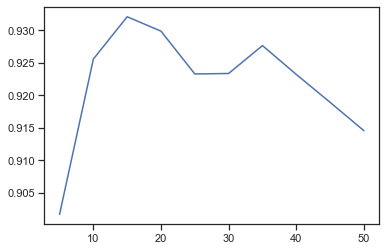

In [25]:
plt.plot(n_range,clf_gs.cv_results_['mean_test_score'])

In [26]:
clf_rs = RandomizedSearchCV(KNeighborsClassifier(),tuned_parameters, cv=15,scoring='accuracy')
clf_rs.fit(breast_cancer_X_train, breast_cancer_y_train)

RandomizedSearchCV(cv=15, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='accuracy')

In [27]:
clf_rs.best_score_

0.9321146953405018

In [28]:
clf_rs.best_params_

{'n_neighbors': 15}

In [29]:
# Первичное обучение модели и оценка качества
cls_simple = KNeighborsClassifier(n_neighbors=15)
cls_simple.fit(breast_cancer_X_train, breast_cancer_y_train)
target_simple = cls_simple.predict(breast_cancer_X_test)
target_simple_train_prediction = cls_simple.predict(breast_cancer_X_train)
target_simple

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1])

In [30]:
mtr.accuracy_score(breast_cancer_y_test, target_simple)

0.9210526315789473

In [31]:
# Обучение модели и оценка качества с учетом подобранных гиперпараметров
clf_gs.best_estimator_.fit(breast_cancer_X_train, breast_cancer_y_train)
target2_0 = clf_gs.best_estimator_.predict(breast_cancer_X_train)
target2_1 = clf_gs.best_estimator_.predict(breast_cancer_X_test)

# Новое качество модели
mtr.accuracy_score(breast_cancer_y_train, target2_0), mtr.accuracy_score(breast_cancer_y_test, target2_1)

(0.9362637362637363, 0.9210526315789473)

In [32]:
# 6.Построение кривых обучения и валидации

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Kotos\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

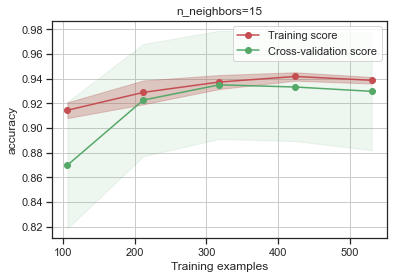

In [33]:
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=15', 
                    breast_cancer.data, breast_cancer.target, cv=15, train_sizes=np.linspace(.2, 1.0, 5))

In [34]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Kotos\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

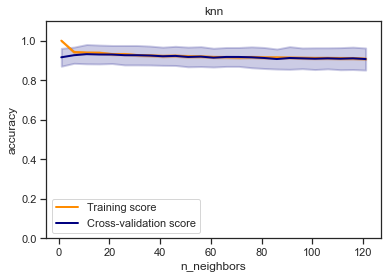

In [35]:
n_range2 = np.array(range(1,125,5))
plot_validation_curve(clf_gs.best_estimator_, 'knn', 
                      breast_cancer.data, breast_cancer.target, 
                      param_name='n_neighbors', param_range=n_range2, 
                      cv=15, scoring="accuracy")